# Python DL_NLP Crash Course_Part 4: Text Classification with CNN LSTM

## Full Day Workshop for user learn Data Science with Python
### 2017 Dec Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose


# Text Classification
## Neural Model for Document Classification



TC describes a general class of problems such as predicting the sentiment of
tweets and movie reviews, as well as classifying email as spam or not. Deep learning methods are
proving very good at text classication, achieving state-of-the-art results on a suite of standard
academic benchmark problems. In this chapter, you will discover some best practices to consider
when developing deep learning models for text classication. 

### Word Embeddings + CNN / LSTM = Text Classication
The modus operandi for text classication involves the use of a word embedding for representing
words and a Convolutional Neural Network (CNN) for learning how to discriminate documents
on classication problems. Yoav Goldberg, in his primer on deep learning for natural language
processing, comments that neural networks in general oer better performance than classical
linear classiers, especially when used with pre-trained word embeddings.

The architecture is therefore comprised of three key pieces:
1. Word Embedding: A distributed representation of words where dierent words that
have a similar meaning (based on their usage) also have a similar representation.
2. Convolutional Model: A feature extraction model that learns to extract salient features
from documents represented using a word embedding.
3. Fully Connected Model: The interpretation of extracted features in terms of a predictive
output.

# Section 1:  Convolutional Neural Networks
## Recap
Given a dataset of gray scale images with the standardized size of 32  32 pixels each, a
traditional feedforward neural network would require 1,024 input weights (plus one bias). This
is fair enough, but the 
attening of the image matrix of pixels to a long vector of pixel values
loses all of the spatial structure in the image. Unless all of the images are perfectly resized, the
neural network will have great diculty with the problem.
Convolutional Neural Networks expect and preserve the spatial relationship between pixels
by learning internal feature representations using small squares of input data. Features are
learned and used across the whole image, allowing for the objects in the images to be shifted or
translated in the scene and still detectable by the network. It is this reason why the network is
so useful for object recognition in photographs, picking out digits, faces, objects and so on with
varying orientation. In summary, below are some of the benets of using convolutional neural
networks:


- They use fewer parameters (weights) to learn than a fully connected network.

- They are designed to be invariant to object position and distortion in the scene.

- They automatically learn and generalize features from the input domain.

## Building Blocks of Convolutional Neural Networks
There are three types of layers in a Convolutional Neural Network:
1. Convolutional Layers.
2. Pooling Layers.
3. Fully-Connected Layers. 

## Convolutional Layers
Convolutional layers are comprised of lters and feature maps.

###  Filters
The lters are essentially the neurons of the layer. They have both weighted inputs and generate
an output value like a neuron. The input size is a xed square called a patch or a receptive
eld. If the convolutional layer is an input layer, then the input patch will be pixel values. If
they deeper in the network architecture, then the convolutional layer will take input from a
feature map from the previous layer.

###  Feature Maps
The feature map is the output of one lter applied to the previous layer. A given lter is drawn
across the entire previous layer and moved one pixel at a time. Each position results in an
activation of the neuron and the output is collected in the feature map. You can see that if the
receptive eld is moved one pixel from activation to activation, then the eld will overlap with
the previous activation by (eld width - 1) input values.
The distance that lter is moved across the input from the previous layer each activation is
referred to as the stride. If the size of the previous layer is not cleanly divisible by the size of
the lter's receptive eld and the size of the stride then it is possible for the receptive eld to
attempt to read o the edge of the input feature map. In this case, techniques like zero padding
can be used to invent mock inputs with zero values for the receptive eld to read.

## Pooling Layers
The pooling layers down-sample the previous layers feature map. Pooling layers follow a sequence
of one or more convolutional layers and are intended to consolidate the features learned and
expressed in the previous layer's feature map. As such, pooling may be considered a technique
to compress or generalize feature representations and generally reduce the overtting of the
training data by the model.
They too have a receptive eld, often much smaller than the convolutional layer. Also, the
stride or number of inputs that the receptive eld is moved for each activation is often equal to
the size of the receptive eld to avoid any overlap. Pooling layers are often very simple, taking
the average or the maximum of the input value in order to create its own feature map.

## Fully Connected Layers
Fully connected layers are the normal 
at feedforward neural network layer. These layers may
have a nonlinear activation function or a softmax activation in order to output probabilities
of class predictions. Fully connected layers are used at the end of the network after feature
extraction and consolidation has been performed by the convolutional and pooling layers. They
are used to create nal nonlinear combinations of features and for making predictions by the
network. 

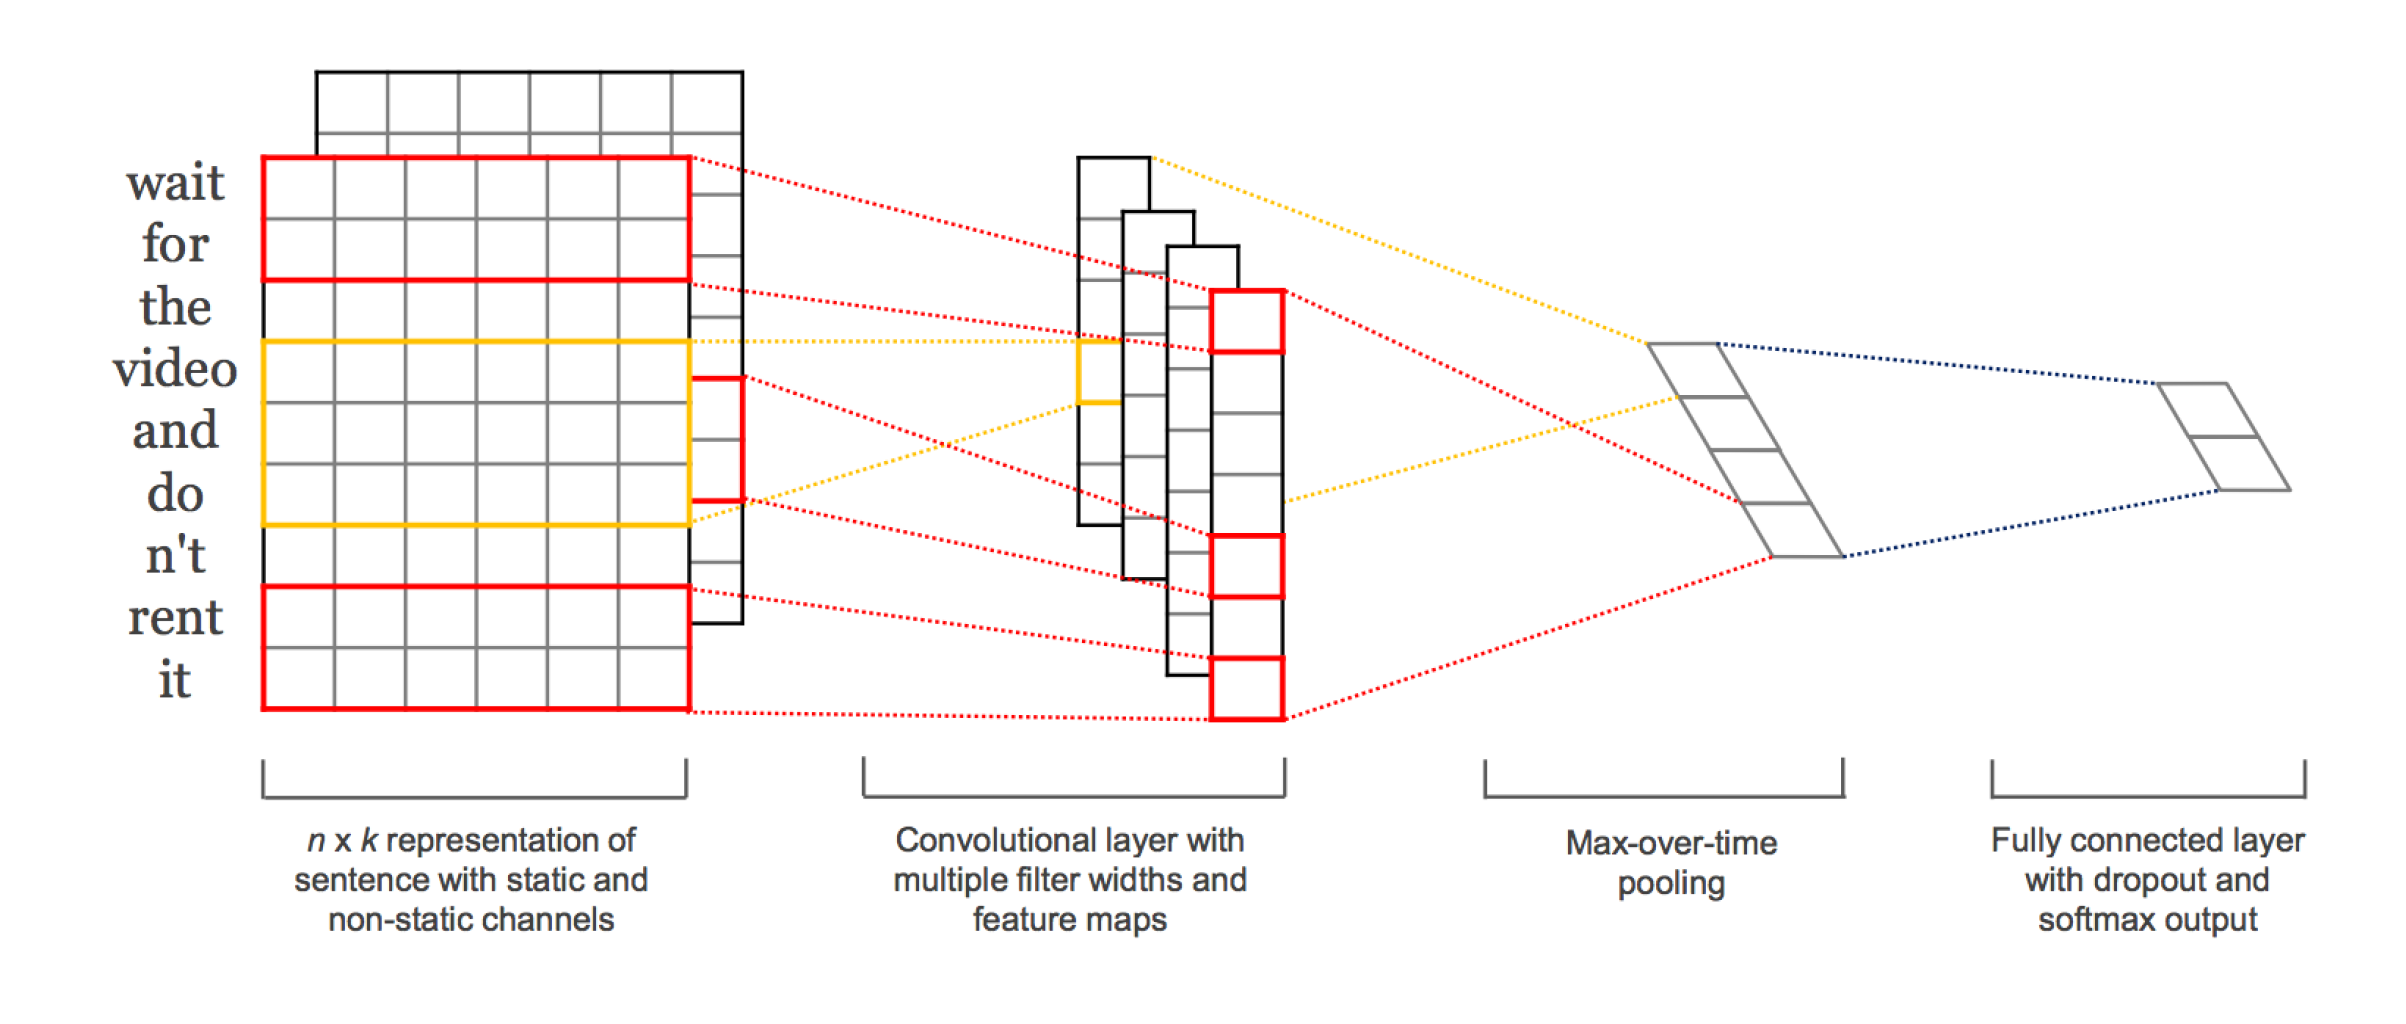

## CNN in Text Context
- Sentences are mapped to embedding vectors and are available as a matrix
input to the model. 
- Convolutions are performed across the input word-wise using differently
sized kernels, 
- such as 2 or 3 words at a time. 
- The resulting feature maps are then processed
using a max pooling layer to condense or summarize the extracted features.

## Starting Point

- Transfer function: rectified linear.
- Kernel sizes: 2, 4, 5.
- Number of filters: 100.
- Dropout rate: 0.5.
- Weight regularization (L2): 3.
- Batch Size: 50.
- Update Rule: Adadelta.


## Convolutional Neural Networks Best Practices

Now that we know about the building blocks for a convolutional neural network and how the
layers hang together, we can review some best practices to consider when applying them.

- The choice of pre-trained Word2Vec and GloVe embeddings dier from problem to problem,
and both performed better than using one hot encoded word vectors.
- The size of the kernel is important and should be tuned for each problem.
- The number of feature maps is also important and should be tuned.
- The 1-max pooling generally outperformed other types of pooling.
- Dropout has little effect on the model performance.
- Use Word2Vec or GloVe word embeddings as a starting point and tune them while tting
the model.
- Grid search across dierent kernel sizes to nd the optimal conguration for your problem, in the range 1-10.
- Search the number of lters from 100-600 and explore a dropout of 0.0-0.5 as part of the
same search.
- Explore using tanh, relu, and linear activation functions.
The key

# Project : Predict Sentiment From Movie Reviews
Sentiment analysis is a natural language processing problem where text is understood and the
underlying intent is predicted. In this lesson you will discover how you can predict the sentiment
of movie reviews as either positive or negative in Python using the Keras deep learning library.
After completing this step-by-step tutorial, you will know:
 About the IMDB sentiment analysis problem for natural language processing and how to
load it in Keras.
- How to use word embedding in Keras for natural language problems.
- How to develop and evaluate a Multilayer Perceptron model for the IMDB problem.
- How to develop a one-dimensional convolutional neural network model for the IMDB problem. 

## Movie Review Sentiment Classication Dataset
The dataset used in this project is the Large Movie Review Dataset often referred to as the
IMDB dataset1. The IMDB dataset contains 50,000 highly-polar movie reviews (good or bad)
for training and the same amount again for testing. The problem is to determine whether a
given movie review has a positive or negative sentiment.
The data was collected by Stanford researchers and was used in a 2011 paper where a split
of 50-50 of the data was used for training and test2. An accuracy of 88.89% was achieved.

Keras provides access to the IMDB dataset built-in3. The imdb.load data() function allows
you to load the dataset in a format that is ready for use in neural network and deep learning. models. The words have been replaced by integers that indicate the absolute popularity of the
word in the dataset. The sentences in each review are therefore comprised of a sequence of
integers. 

Calling imdb.load data() the rst time will download the IMDB dataset to your computer
and store it in your home directory under ~/.keras/datasets/imdb.pkl as a 32 megabyte le.
Usefully, the imdb.load data() function provides additional arguments including

- the numberof top words to load (where words with a lower integer are marked as zero in the returned data),
- the number of top words to skip (to avoid the the's) 
- the maximum length of reviews to support. 

Let's load the dataset and calculate some properties of it. We will start o by loading
some libraries and loading the entire IMDB dataset as a training dataset.

Loading and Cleaning Reviews
The text data is already pretty clean; not much preparation is required. Without getting bogged
down too much in the details, we will prepare the data using the following way:
- Split tokens on white space.
- Remove all punctuation from words.
- Remove all words that are not purely comprised of alphabetical characters.
- Remove all words that are known stop words.
- Remove all words that have a length  1 character.

In [ ]:
# The code was removed by DSX for sharing.

In [ ]:
from nltk.corpus import stopwords
import string
import re
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text


# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens


# load the document
filename = 'txt_sentoken/pos/cv000_29590.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

In [1]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

Using TensorFlow backend.


16891904/17464789 [============================>.] - ETA: 0s

In [2]:
# summarize size
# Next we can display the shape of the training dataset.
print("Training data: ")
print(X.shape)
print(y.shape)

# Running this snippet, we can see that there are 50,000 records

Training data: 
(50000,)
(50000,)


In [4]:
# Summarize number of classes

print("Classes: ")
print(numpy.unique(y))

# We can see that it is a binary classification problem for good and bad sentiment in the review.

Classes: 
[0 1]


In [5]:
# Next we can get an idea of the total number of unique words in the dataset.
# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
88585


### Finally, we can get an idea of the average review length.

Review length: 
Mean 234.76 words (172.911495)


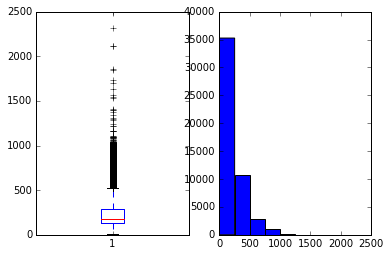

In [9]:
# Summarize review length
print("Review length: ")
result = map(len, X)
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length as a boxplot and histogram
pyplot.subplot(121)
pyplot.boxplot(result)
pyplot.subplot(122)
pyplot.hist(result)
pyplot.show()

# Kickstart with Word Embedding
We would like to use a word embedding representation for the IMDB dataset. Let's say
that we are only interested in the rst 5,000 most used words in the dataset. Therefore our vocabulary size will be 5,000. We can choose to use a 32-dimensional vector to represent each
word. Finally, we may choose to cap the maximum review length at 500 words, truncating
reviews longer than that and padding reviews shorter than that with 0 values. We would load
the IMDB dataset as follows:

- imdb.load_data(num_words=5000)

We would then use the Keras utility to truncate or pad the dataset to a length of 500 for
each observation using the sequence.pad sequences() function

- X_train = sequence.pad_sequences(X_train, maxlen=500)
- X_test = sequence.pad_sequences(X_test, maxlen=500)

Finally, later on, the rst layer of our model would be an word embedding layer created
using the Embedding class as follows:

- Embedding(5000, 32, input_length=500)

The output of this rst layer would be a matrix with the size 32  500 for a given movie
review training or test pattern in integer format. Now that we know how to load the IMDB
dataset in Keras and how to use a word embedding representation for it, let's develop and
evaluate some models.



## 1. Simple Version with MLP

We can start o by developing a simple Multilayer Perceptron model with a single hidden layer.
The word embedding representation is a true innovation and we will demonstrate what would
have been considered world class results in 2011 with a relatively simple neural network. Let's
start o by importing the classes and functions required for this model and initializing the
random number generator to a constant value to ensure we can easily reproduce the results.

In [11]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Next we will load the IMDB dataset. We will simplify the dataset as discussed during the
section on word embeddings. Only the top 5,000 words will be loaded. We will also use a
50%/50% split of the dataset into training and test. This is a good standard split methodology.

In [12]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [13]:
# We will bound reviews at 500 words, truncating longer reviews and zero-padding shorter reviews.

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

Now we can create our model. We will use an Embedding layer as the input layer, setting
the vocabulary to 5,000, the word vector size to 32 dimensions and the input length to 500.
The output of this rst layer will be a 32500 sized matrix as discussed in the previous section.
We will 
atten the Embedding layers output to one dimension, then use one dense hidden layer
of 250 units with a rectier activation function. The output layer has one neuron and will use a
sigmoid activation to output values of 0 and 1 as predictions. The model uses logarithmic loss
and is optimized using the ecient ADAM optimization procedure.

In [14]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


We can t the model and use the test set as validation while training. This model overts
very quickly so we will use very few training epochs, in this case just 2. There is a lot of data so
we will use a batch size of 128. After the model is trained, we evaluate its accuracy on the test
dataset.

In [16]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128,
verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 35s - loss: 0.5168 - acc: 0.7044 - val_loss: 0.3014 - val_acc: 0.8701
Epoch 2/2
25000/25000 [==============================] - 33s - loss: 0.1899 - acc: 0.9267 - val_loss: 0.3123 - val_acc: 0.8694
Accuracy: 86.94%


## 2. Full Version with One-Dimensional Convolutional Neural Network
Convolutional neural networks were designed to honor the spatial structure in image data whilst
being robust to the position and orientation of learned objects in the scene. This same principle
can be used on sequences, such as the one-dimensional sequence of words in a movie review.
The same properties that make the CNN model attractive for learning to recognize objects in
images can help to learn structure in paragraphs of words, namely the techniques invariance to
the specic position of features.
Keras supports one dimensional convolutions and pooling by the Conv1D and MaxPooling1D
classes respectively. Again, let's import the classes and functions needed for this example and initialize our random number generator to a constant value so that we can easily reproduce
results.

## Use a Single Layer CNN Architecture
You can get good results for document classication with a single layer CNN, perhaps with
dierently sized kernels across the lters to allow grouping of word representations at dierent
scales. 

Yoon Kim in his study of the use of pre-trained word vectors for classication tasks with


** Convolutional Neural Networks found that using pre-trained static word vectors does very well **

He suggests that pre-trained word embeddings that were trained on very large text corpora,
such as the freely available Word2Vec vectors trained on 100 billion tokens from Google news
may oer good universal features for use in natural language processing.

The architecture is based on the approach used by Ronan Collobert, et al. in their paper
Natural Language Processing (almost) from Scratch, 2011. In it, they develop a single end-to-end
neural network model with convolutional and pooling layers for use across a range of fundamental
natural language processing problems.

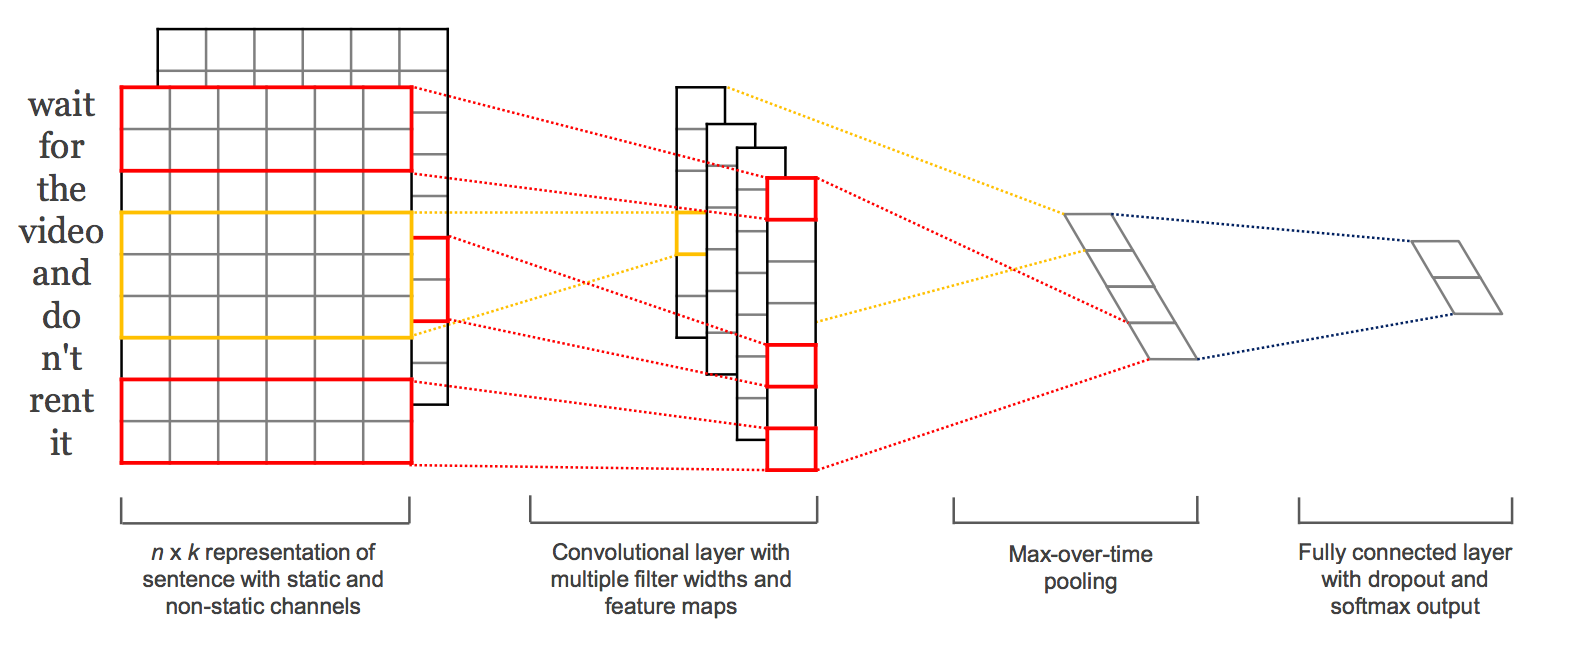

*_ An example of a CNN Filter and Polling Architecture for Natural Language
Processing. Taken from Convolutional Neural Networks for Sentence Classication. *_

In [2]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


### We can also load and prepare our IMDB dataset as we did before.

In [3]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

We can now dene our convolutional neural network model. This time, after the Embedding
input layer, we insert a Conv1D layer. This convolutional layer has 32 feature maps and reads
embedded word representations 3 vector elements of the word embedding at a time. The
convolutional layer is followed by a MaxPooling1D layer with a length and stride of 2 that halves
the size of the feature maps from the convolutional layer. The rest of the network is the same
as the neural network above.

In [4]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
36s - loss: 0.4534 - acc: 0.7609 - val_loss: 0.3169 - val_acc: 0.8623
Epoch 2/2
36s - loss: 0.2473 - acc: 0.9019 - val_loss: 0.2977 - val_acc: 0.8731
Accuracy: 87.31%


Running the example, we are rst presented with a summary of the network structure (not shown here). We can see our convolutional layer preserves the dimensionality of our Embedding input layer of 32 dimensional input with a maximum of 500 words. The pooling layer compresses this representation by halving it. Running the example oers a small but welcome improvement over the neural network model above with an accuracy of nearly 87.79%.

## Summary
In this lesson you discovered the IMDB sentiment analysis dataset for natural language processing.
You learned how to develop deep learning models for sentiment analysis including:
- How to load and review the IMDB dataset within Keras.
- How to develop a large neural network model for sentiment analysis.
- How to develop a one-dimensional convolutional neural network model for sentiment
analysis.
This tutorial concludes Part V and your introduction to convolutional neural networks in
Keras. Next in Part VI we will discover a dierent type of neural network intended to learn and
predict sequences called recurrent neural networks.

 ## Appendix 1: Tunning CNN Hyperparameters

The study makes a number of useful ndings that could be used as a starting point for
conguring shallow CNN models for text classication. The general ndings were as follows:

- The choice of pre-trained Word2Vec and GloVe embeddings dier from problem to problem,
and both performed better than using one hot encoded word vectors.
- The size of the kernel is important and should be tuned for each problem.
- The number of feature maps is also important and should be tuned.
- The 1-max pooling generally outperformed other types of pooling.
- Dropout has little eect on the model performance.
- Use Word2Vec or GloVe word embeddings as a starting point and tune them while tting
the model.
- Grid search across dierent kernel sizes to nd the optimal conguration for your problem,
in the range 1-10.
- Search the number of lters from 100-600 and explore a dropout of 0.0-0.5 as part of the
same search.
- Explore using tanh, relu, and linear activation functions.
The key caveat is that the ndings are based on empirical results on binary text classication
problems using single sentences as input.

## Consider Character-Level CNNs
Text documents can be modeled at the character level using convolutional neural networks
that are capable of learning the relevant hierarchical structure of words, sentences, paragraphs,
and more. Xiang Zhang, et al. use a character-based representation of text as input for a
convolutional neural network. The promise of the approach is that all of the labor-intensive
eort required to clean and prepare text could be overcome if a CNN can learn to abstract the
salient details.

The model reads in one hot encoded characters in a xed-sized alphabet. Encoded characters
are read in blocks or sequences of 1,024 characters. A stack of 6 convolutional layers with
pooling follows, with 3 fully connected layers at the output end of the network in order to make
a prediction.

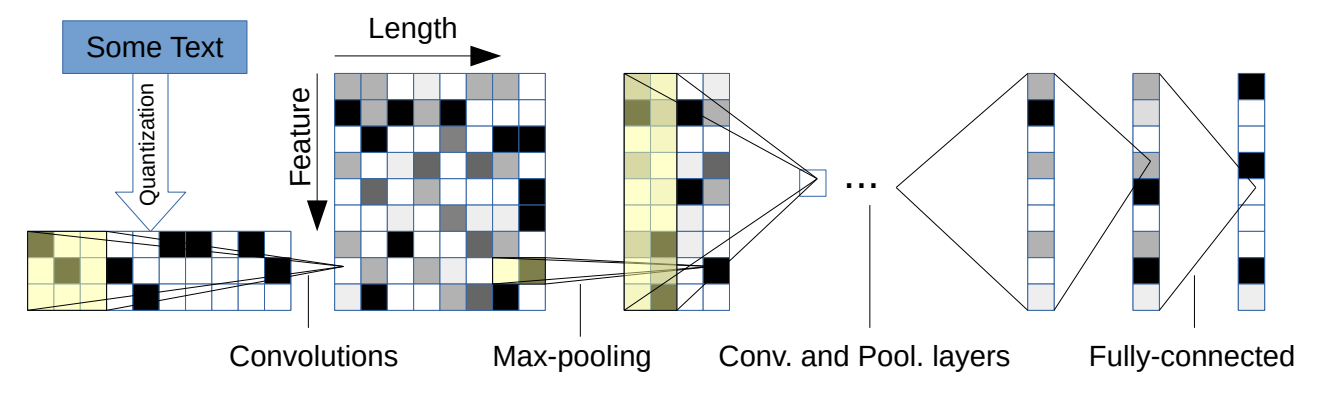

## Consider Deeper CNNs for Classication`
Better performance can be achieved with very deep convolutional neural networks, although
standard and reusable architectures have not been adopted for classication tasks, yet. Alexis
Conneau, et al. comment on the relatively shallow networks used for natural language processing
and the success of much deeper networks used for computer vision applications. For example,
Kim (above) restricted the model to a single convolutional layer.
Other architectures used for natural language reviewed in the paper are limited to 5 and 6
layers. These are contrasted with successful architectures used in computer vision with 19 or
even up to 152 layers. They suggest and demonstrate that there are benets for hierarchical
feature learning with very deep convolutional neural network model, called VDCNN.


Results on a suite of 8 large text classication tasks show better performance than more
shallow networks. Specically, state-of-the-art results on all but two of the datasets tested,
at the time of writing. Generally, they make some key ndings from exploring the deeper
architectural approach:
- The very deep architecture worked well on small and large datasets.
- Deeper networks decrease classication error.
- Max-pooling achieves better results than other, more sophisticated types of pooling.
- Generally going deeper degrades accuracy; the shortcut connections used in the architecture are important.

# Section 2:  Recurrent Network & LSTM
## Recap

There is another type of neural network that is dominating dicult machine learning problems
that involve sequences of inputs called recurrent neural networks. Recurrent neural networks
have connections that have loops, adding feedback and memory to the networks over time. This
memory allows this type of network to learn and generalize across sequences of inputs rather
than individual patterns.

Recurrent Neural Networks or RNNs are a special type of neural network designed for sequence
problems. Given a standard feedforward Multilayer Perceptron network, a recurrent neural
network can be thought of as the addition of loops to the architecture. For example, in a given
layer, each neuron may pass its signal laterally (sideways) in addition to forward to the next
layer. The output of the network may feedback as an input to the network with the next input
vector. And so on.
The recurrent con

## Long Short Term Memory
The Long Short-Term Memory or LSTM network is a recurrent neural network that is trained
using Backpropagation Through Time and overcomes the vanishing gradient problem. As such
it can be used to create large (stacked) recurrent networks, that in turn can be used to address
dicult sequence problems in machine learning and achieve state-of-the-art results. Instead of
neurons, LSTM networks have memory blocks that are connected into layers.


A block has components that make it smarter than a classical neuron and a memory for
recent sequences. A block contains gates that manage the block's state and output. A unit
operates upon an input sequence and each gate within a unit uses the sigmoid activation
function to control whether they are triggered or not, making the change of state and addition
of information 
owing through the unit conditional. There are three types of gates within a
memory unit:

- Forget Gate: conditionally decides what information to discard from the unit.
- Input Gate: conditionally decides which values from the input to update the memory state.
- Output Gate: conditionally decides what to output based on input and the memory of the unit.


Each unit is like a mini state machine where the gates of the units have weights that are
learned during the training procedure. You can see how you may achieve a sophisticated learning
and memory from a layer of LSTMs, and it is not hard to imagine how higher-order abstractions
may be layered with multiple such layers.

# Project: Sequence Classification of Movie Reviews
Sequence classication is a predictive modeling problem where you have some sequence of inputs
over space or time and the task is to predict a category for the sequence. What makes this
problem dicult is that the sequences can vary in length, be comprised of a very large vocabulary
of input symbols and may require the model to learn the long term context or dependencies
between symbols in the input sequence. In this project you will discover how you can develop
LSTM recurrent neural network models for sequence classication problems in Python using
the Keras deep learning library. After completing this project you will know:
- How to develop an LSTM model for a sequence classication problem.
- How to reduce overtting in your LSTM models through the use of dropout.
- How to combine LSTM models with Convolutional Neural Networks that excel at learning
spatial relationships.

## 1. Simple LSTM for Sequence Classication
The problem that we will use to demonstrate sequence learning in this tutorial is the IMDB
movie review sentiment classication problem, introduced in Section 22.1. We can quickly
develop a small LSTM for the IMDB problem and achieve good accuracy. Let's start o by
importing the classes and functions required for this model and initializing the random number
generator to a constant value to ensure we can easily reproduce the results.

In [6]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

### We need to load the IMDB dataset. We are constraining the dataset to the top 5,000 words.
We also split the dataset into train (50%) and test (50%) sets.

In [8]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

Next, we need to truncate and pad the input sequences so that they are all the same length
for modeling. The model will learn the zero values carry no information so indeed the sequences
are not the same length in terms of content, but same length vectors is required to perform the
computation in Keras.

In [9]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

We can now dene, compile and t our LSTM model. The rst layer is the Embedded layer that uses 32 length vectors to represent each word. The next layer is the LSTM layer with 100
memory units (smart neurons). Finally, because this is a classication problem we use a Dense
output layer with a single neuron and a sigmoid activation function to make 0 or 1 predictions
for the two classes (good and bad) in the problem. Because it is a binary classication problem,
log loss is used as the loss function (binary crossentropy in Keras). The ecient ADAM
optimization algorithm is used. The model is t for only 3 epochs because it quickly overts
the problem. A large batch size of 64 reviews is used to space out weight updates.

In [12]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
11584/25000 [============>.................] - ETA: 181s - loss: 0.6977 - acc: 0.5666

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/gpfs/fs01/user/sbb6-28ae32a56257b0-666d72869b6d/.local/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/gpfs/fs01/user/sbb6-28ae32a56257b0-666d72869b6d/.local/lib/python2.7/site-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/gpfs/fs01/user/sbb6-28ae32a56257b0-666d72869b6d/.local/lib/python2.7/site-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(fr

IndexError: string index out of range

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Once fit, we estimate the performance of the model on unseen reviews.

## 2. LSTM For Sequence Classication With Dropout 
Recurrent Neural networks like LSTM generally have the problem of overtting. Dropout can
be applied between layers using the Dropout Keras layer. We can do this easily by adding new

In [ ]:
# Dropout layers between the Embedding and LSTM layers and the LSTM and Dense output layers. For example:
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

### Recurrent Drop Out

We can see dropout having the desired impact on training with a slightly slower trend
in convergence and in this case a lower nal accuracy. The model could probably use a few
more epochs of training and may achieve a higher skill (try it an see). Alternately, dropout
can be applied to the input and recurrent connections of the memory units with the LSTM
precisely and separately. Keras provides this capability with parameters on the LSTM layer,
the dropout for conguring the input dropout and recurrent dropout for conguring the
recurrent dropout. For example, we can modify the rst example to add dropout to the input
and recurrent connections as follows:

In [14]:
# LSTM with dropout for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
 5056/25000 [=====>........................] - ETA: 292s - loss: 0.6698 - acc: 0.5932

KeyboardInterrupt: 

We can see that the LSTM specic dropout has a more pronounced eect on the convergence
of the network than the layer-wise dropout. As above, the number of epochs was kept constant
and could be increased to see if the skill of the model can be further lifted. Dropout is a powerful
technique for combating overtting in your LSTM models and it is a good idea to try both
methods, but you may bet better results with the gate-specic dropout provided in Keras.

## 3. Advanced / LSTM and CNN For Sequence Classication

Convolutional neural networks excel at learning the spatial structure in input data. The IMDB
review data does have a one-dimensional spatial structure in the sequence of words in reviews
and 

the CNN may be able to pick out invariant features for good and bad sentiment. 

This learned spatial features may then be learned as sequences by an LSTM layer.

### We can easily add a one-dimensional CNN and max pooling layers after the Embedding layer which then feed the consolidated features to the LSTM. 

We can use a smallish set of 32 features with a small
fillter length of 3. The pooling layer can use the standard length of 2 to halve the feature map
size. For example, we would create the model as follows:

In [ ]:
# LSTM and CNN for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

We can see that we achieve similar results to the rst example although with less weights and
faster training time. I would expect that even better results could be achieved if this example
was further extended to use dropout.

## Summary
In this project you discovered how to develop LSTM network models for sequence classication
predictive modeling problems. Specically, you learned:
- How to develop a simple single layer LSTM model for the IMDB movie review sentiment
classication problem.
- How to extend your LSTM model with layer-wise and LSTM-specic dropout to reduce
overtting.
- How to combine the spatial structure learning properties of a Convolutional Neural Network
with the sequence learning of an LSTM.